In [17]:
#importamos las librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import rebound as rb
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [18]:
sim=rb.Simulation() #generamos la simulacion

In [19]:
sim.units=('AU','yr','Msun') #definicion de unidades
#agregamos los objetos necesarios
date="2024-01-01 00:00"
sim.add("Sun",date=date)
sim.add("399",date=date) #tierra
sim.add("301",date=date) #luna

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '301'... 
Found: Moon (301) 


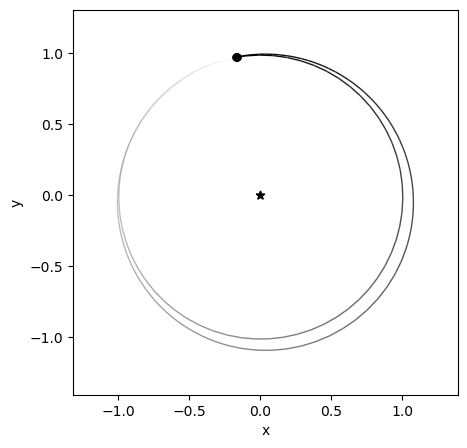

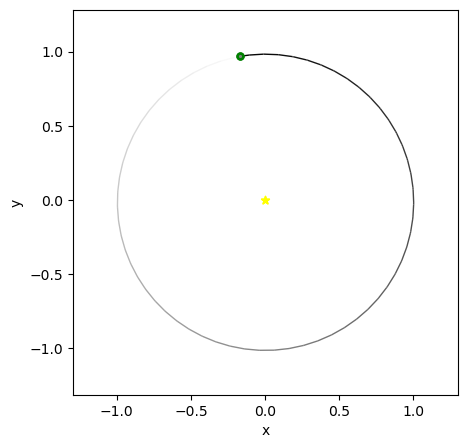

In [20]:
sim.move_to_com() #mover la simulacion al centro de masas

#gráfico orbitas
fig = rebound.OrbitPlot(sim)
ob1 = rebound.OrbitPlot(sim, particles = [1])
ob1.particles.set_color("green")
ob1.primary.set_color('yellow')
ob2 = rebound.OrbitPlot(sim, particles = [2], primary=1, color=True, show_primary=False, fig=ob1.fig, ax = ob1.ax)
ob2.particles.set_color("gray")
ob2.particles.set_sizes([1])

In [21]:
import datetime #fechas y horarios de rebound

dias_simulados = 396 #dias entre el 2024/01/01 hasta 2025/01/31

Noutputs = 10000

# integrar la simulación
t = np.linspace(0, (dias_simulados/365.25), Noutputs) #desde 0 hasta el tiempo que la simulacion en años, en 10,000 pasos


In [22]:
#definición de posiciones espaciales
pos_x = np.zeros((3, Noutputs)) 
pos_y = np.zeros((3, Noutputs)) 
pos_z = np.zeros((3, Noutputs)) 

In [23]:
#index de partículas
sol = sim.particles[0]
tierra = sim.particles[1]
luna = sim.particles[2]

In [24]:
for i,time in enumerate(t):
    sim.integrate(time)

    pos_x[0][i]= sol.x
    pos_y[0][i]= sol.y 
    pos_z[0][i]= sol.z

    pos_x[1][i]= tierra.x
    pos_y[1][i]= tierra.y 
    pos_z[1][i]= tierra.z

    pos_x[2][i]= luna.x
    pos_y[2][i]= luna.y 
    pos_z[2][i]= luna.z

In [25]:
vector_sol_tierra = np.array([pos_x[1]-pos_x[0], pos_y[1]-pos_y[0], pos_z[1]-pos_z[0]])
vector_sol_luna = np.array([pos_x[2]-pos_x[0], pos_y[2]-pos_y[0], pos_z[2]-pos_z[0]])

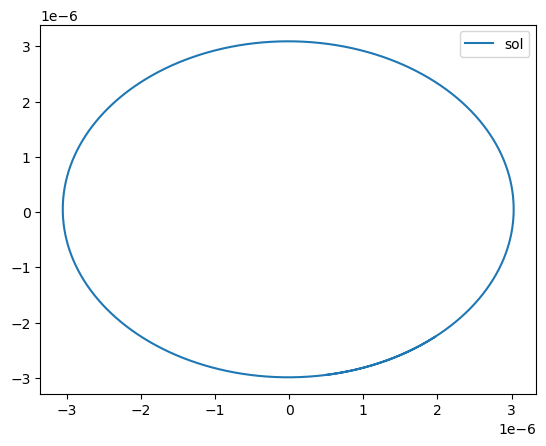

In [26]:
plt.plot(pos_x[0],pos_y[0], label = 'sol')
plt.legend()

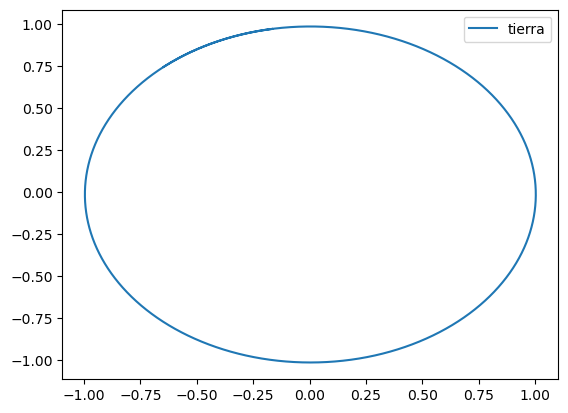

In [27]:
plt.plot(pos_x[1],pos_y[1], label = 'tierra')
plt.legend()

In [28]:
scalar_pos = [] #lista que almacena tiempos de eclipse solar
scalar_neg = [] #lista que almacena tiempos de eclipse lunar
producto_punto = [] #lista que almacena los valores del producto punto entre vectores
parcial_sol = [] #lista que almacena los tiempos de eclipses parciales solares
parcial_luna = [] #lista que almacena los tiempos de eclipses parciales lunares

for i, time in enumerate(t):
    sim.integrate(time)

    p_punto = np.dot(vector_sol_tierra[:, i], vector_sol_luna[:, i])
    producto_punto.append(p_punto)

    mag_tierra = np.linalg.norm(vector_sol_tierra[:, i])
    mag_luna = np.linalg.norm(vector_sol_luna[:, i])

    if (1-0.00001) < (p_punto) < (1 + 0.00001): #eclipses totales
        if mag_luna < mag_tierra:
            scalar_pos.append(time) #solar
        elif mag_luna > mag_tierra:
            scalar_neg.append(time) #lunar

    if (0.983) < (p_punto) < (0.997) or (1.013) < (p_punto) < (1.027): #eclipses parciales
        if mag_luna > mag_tierra:
            parcial_luna.append(time) #solar
        elif mag_luna < mag_tierra:
            parcial_sol.append(time) #lunar

np.max(producto_punto)
np.min(producto_punto)

0.9644974375810819

In [29]:
# Convertir los tiempos de años a fechas
fecha_inicio = datetime.datetime(2024,1,1)
eclipsesolar_dates = [fecha_inicio + datetime.timedelta(days=time * 365.25) for time in scalar_pos]
eclipselunar_dates = [fecha_inicio + datetime.timedelta(days=time * 365.25) for time in scalar_neg]

eclipse_casi_solar_dates = [fecha_inicio + datetime.timedelta(days=time * 365.25) for time in parcial_sol]
eclipse_casi_lunar_dates = [fecha_inicio + datetime.timedelta(days=time * 365.25) for time in parcial_luna]


In [30]:
print("Fechas de eclipse solar:")
for date in eclipsesolar_dates:
    print(date.strftime("%Y-%m-%d"))
print("Fechas de eclipse lunar:")
for date in eclipselunar_dates:
    print(date.strftime("%Y-%m-%d"))

Fechas de eclipse solar:
2024-04-07
2024-09-30
Fechas de eclipse lunar:


In [31]:
fechas_str = [str(fecha)[:10] for fecha in eclipsesolar_dates]
valores_distintos = set(fechas_str)

for valor in valores_distintos:
    print('Fechas eclipses solares:', valor)


Fechas eclipses solares: 2024-04-07
Fechas eclipses solares: 2024-09-30


In [32]:
fechas_str = [str(fecha)[:10] for fecha in eclipse_casi_solar_dates]
valores_distintos = set(fechas_str)

for valor in valores_distintos:
    print('Fechas eclipses solares parciales:', valor)

Fechas eclipses solares parciales: 2024-08-09
Fechas eclipses solares parciales: 2024-03-17
Fechas eclipses solares parciales: 2024-10-07
Fechas eclipses solares parciales: 2024-10-30
Fechas eclipses solares parciales: 2024-08-12
Fechas eclipses solares parciales: 2024-05-04
Fechas eclipses solares parciales: 2024-10-28
Fechas eclipses solares parciales: 2024-03-09
Fechas eclipses solares parciales: 2024-08-06
Fechas eclipses solares parciales: 2024-03-11
Fechas eclipses solares parciales: 2024-03-07
Fechas eclipses solares parciales: 2024-03-10
Fechas eclipses solares parciales: 2024-09-10
Fechas eclipses solares parciales: 2024-03-14
Fechas eclipses solares parciales: 2024-08-29
Fechas eclipses solares parciales: 2024-09-05
Fechas eclipses solares parciales: 2024-08-03
Fechas eclipses solares parciales: 2024-09-08
Fechas eclipses solares parciales: 2024-05-13
Fechas eclipses solares parciales: 2024-08-31
Fechas eclipses solares parciales: 2024-10-27
Fechas eclipses solares parciales:

In [33]:
fechas_str = [str(fecha)[:10] for fecha in eclipse_casi_lunar_dates]
valores_distintos = set(fechas_str)

for valor in valores_distintos:
    print('Fechas eclipses lunares parciales:', valor)

Fechas eclipses lunares parciales: 2024-05-21
Fechas eclipses lunares parciales: 2024-10-15
Fechas eclipses lunares parciales: 2024-03-17
Fechas eclipses lunares parciales: 2024-08-23
Fechas eclipses lunares parciales: 2024-08-12
Fechas eclipses lunares parciales: 2024-10-11
Fechas eclipses lunares parciales: 2024-09-12
Fechas eclipses lunares parciales: 2024-08-21
Fechas eclipses lunares parciales: 2024-09-14
Fechas eclipses lunares parciales: 2024-05-16
Fechas eclipses lunares parciales: 2024-05-20
Fechas eclipses lunares parciales: 2024-10-13
Fechas eclipses lunares parciales: 2024-03-23
Fechas eclipses lunares parciales: 2024-08-25
Fechas eclipses lunares parciales: 2024-04-22
Fechas eclipses lunares parciales: 2024-04-26
Fechas eclipses lunares parciales: 2024-04-30
Fechas eclipses lunares parciales: 2024-08-19
Fechas eclipses lunares parciales: 2024-04-25
Fechas eclipses lunares parciales: 2024-08-18
Fechas eclipses lunares parciales: 2024-09-13
Fechas eclipses lunares parciales: